In [1]:
import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import anndata
import celltypist

In [2]:
plt.rcParams["font.family"] = "monospace"
plt.rcParams["font.size"] = 10

In [3]:
adata = anndata.read_h5ad("C:/Users/saman/00_Bachelorarbeit/Bachelor/data/output/adata_norms.h5ad")
adata

AnnData object with n_obs × n_vars = 5397 × 16719
    obs: 'sampleID', 'barcode', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'outlier', 'mt_outlier', '_scvi_batch', '_scvi_labels'
    var: 'n_cells'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'neighbors', 'sampleID_colors', 'umap'
    obsm: 'X_scVI', 'X_umap'
    layers: 'int_norm', 'log_int_norm', 'log_norm', 'norm', 'raw'
    obsp: 'connectivities', 'distances'

In [4]:
marker_genes = {
    "T Cell": 
    [
        "SELL", "CCR7",
        "ITGAE", "ITGA1", "SPRY1", "IL17A", "CCR6", "CCL20",
        "CXCR5", "BCL6", "PDCD1", "CD40LG",
        "FOXP3", "CTLA4", "IL2RA", "IL10",
        "GZMK", "CRTAM", "EOMES", 
        "SELL", "KLRC2", "TRDC", "TRGC1", "KIR2DL4", "CCR7"
        "KLRC2", "TRDC", "TRGC1", "KIR2DL4", 
        "SLC4A10", "TRAV1-2",
        "FCGR3A", "GNLY", "GZMB", "NKG7",
        "XCL1", "IL2RB", "NCR1", "FCER1G", "NCAM1"
    ], 

    "Dentritic Cell": 
    [
        "CLEC9A", "XCR1", "BATF3", "CADM1", "RAB7B",
        "CLEC10A", "FCER1A", "CD1C",
        "CCR7", "LAMP3",
        "IRF7", "CLEC4C", "JCHAIN", "LILRA4", "GZMB",
        "ITGAX", "IL22RA2", "CD207", "RUNX3"
    ], 
    "Macrophage": 
    [
        "LYVE1", "RNASE1", "FOLR2",
        "MMP9", "PLA2G2D", "ADAMDEC1",
        "TREM2", "ACP5", "CTSD", "CSTB",
        "CD5L", "VCAM1", "CXCL12", "PDK4", "RBP7",
        "CD209"
    ],
    "Monocyte": 
    [
        "IL1B", "EREG", "NAMPT", "PLAUR", "VCAN", "FPR1", "CD3D00E", "MPO", "RETN", "RNASE2", "PCLAF"
    ],

    "Plasma B Cell": 
    [
        "XBP1",
        "IGHM",
        "IGHA1",
        "IGHA2",
        "IGHG3", "IGHG1", "IGHG2", "IGHG4"
    ],
    "B Cell": 
    [
        "SPIB", "TCL1A", "CD3D7",
        "IGLL1", "RAG1", "DNTT", "VPREB3",
        "SELL", "TCL1A", "IGHD",
        "CD27", "TNFSF13B",
        "MKI67", "AICDA",
        "BCL6", "SUGCT"
    ], 

    "Endothelial Cell": 
    [
        "RGCC", "COL4A1", "COL4A2", "IL32", "MCAM", "MYO1B",
        "GJA4", "HEY1", "CXCL12", "SEMA3G", "IGFBP3", "FBLN2", "FBLN5", "ELN",
        "BTNL9", "ALPL",
        "ACKR1", "CCL14", "SELE", "TNFRSF6B",
        "CCL21", "TFF3", "PROX1", "NTS",
        "MKI67", "TOP2A"
    ], 

    "Pericyte": 
    [
        "RERGL", "MUSTN1", "LBH", "NET1", "MAP3K20",
        "COX4I2", "HIGD1B", "RGS5", "NDUFA4L2",
        "GPC3", "COL14A1", "ECRG4", "ID4", "FHL2", "CXCL12"
    ],
    "Fibroblast": 
    [
        "ACTG2", "HHIP", "SOSTDC1", "NPNT",
        "CCL21", "CCL19", "TNFSF13B", "TDO2",
        "CTHRC1", "COL12A1", "COL1A1", "CTSK", "COL5A2",
        "APOD", "PLPP1", "MFAP4", "IFITM1", "RASD1",
        "PI16", "RSPO3", "SFRP1", "TM2A",
        "F3", "PLAT", "HSD17B2", "SOX6",
        "ADAMDEC1", "ADAM28", "CCL11", "CCL8", "CCL13", "CFD",
        "KCNN3", "THBS4", "FNDC1", "PPFIBP1"
    ], 
    
    "Epithelial Cells": ["PCNA", "DUT", "MCM3", "HELLS", "SLBP", "CCNB1", "CENPF", "CDC20", "CKS2", "MKI67", "TK1", "KRT15", 
                         "CXCL14", "COL17A1", "PCLAF", "MUC2", "TFF3", "FCGBP", "ZG16", "TOP2A", "MUC17", "TFF1"],
    "Gland Cells": ["LPO", "RARRES1", "ALDH1A3", "CCL28", "TFF3", "MUC5B", "BPIFB2", "AQP5", "PRR4", "CD74", "MUC6", "BPIFB1"],
    "Enteroendocrine Cells": ["HOPX", "CRYBA2", "GCG", "MLN", "GLS", "GAST", "SCGB2A1", "CLTRN", "CES1", "PAX6",
                            "SST", "GHRL", "GC", "ACSL1", "S100A1", "CHGA", "PCSK1N", "SCT", "SCGN", "NEUROD1", "SOX4"],
    "Enterocyte Cells": ["FABP2", "ALDOB", "APOA1", "FABP1", "APOA4", "PRAP1", "PCK1", "RBP2", "SI", "BEST4", "CA7", "OTOP2", "CFTR"],
    "Tuft Cells": ["SH2D6", "LRMP", "MATK", "FYB1", "HPGDS", "POU2F3", "TRPM5"],
    "Goblet Cells": ["GAU1", "MUC2", "TFF3", "FCGBP", "ZG16", "OLFM4", "MKI67", "TOP2A"],
    "Colonocyte Cells": ["SLC26A3", "AQP8", "CEACAM7", "CA1", "GPT", "BEST4", "CA7", "OTOP2"],

}

endo = ["Epithelial Cells", "Gland Cells", "Enteroendocrine Cells", "Enterocyte Cells", "Tuft Cells", "Goblet Cells", "Colonocyte Cells"]

In [5]:
marker_genes_in_data = dict()
for ct, markers in marker_genes.items():
    markers_found = list()
    for marker in markers:
        if marker in adata.var.index:
            markers_found.append(marker)
    marker_genes_in_data[ct] = markers_found

In [6]:
#adata.layers["counts"] = adata.X
adata.X = adata.layers['log_norm']

sc.pp.highly_variable_genes(adata)

sc.tl.pca(adata, use_highly_variable=True)

sc.pp.neighbors(adata, n_pcs=30, use_rep="X_scVI")
sc.tl.umap(adata)

#sc.tl.leiden(adata, key_added="leiden_res0_25", resolution=0.25)
#sc.tl.leiden(adata, key_added="leiden_res0_5", resolution=0.5)
sc.tl.leiden(adata, key_added="leiden_res0_6", resolution=0.6)
#sc.tl.leiden(adata, key_added="leiden_res1", resolution=1.0)

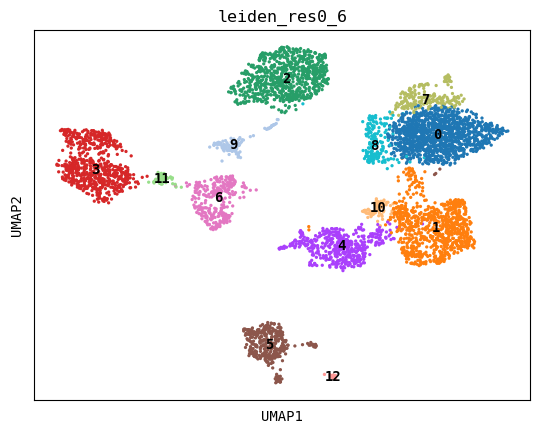

In [7]:
sc.pl.umap( # with total counts norm and log
    adata,
    color=["leiden_res0_6"],
    legend_loc="on data",
)

In [8]:
endo_markers = {
    ct: [m for m in ct_markers if m in adata.var.index]
    for ct, ct_markers in marker_genes_in_data.items()
    if ct in endo
}

other_markers = {
    ct: [m for m in ct_markers if m in adata.var.index]
    for ct, ct_markers in marker_genes_in_data.items()
    if ct not in endo
}

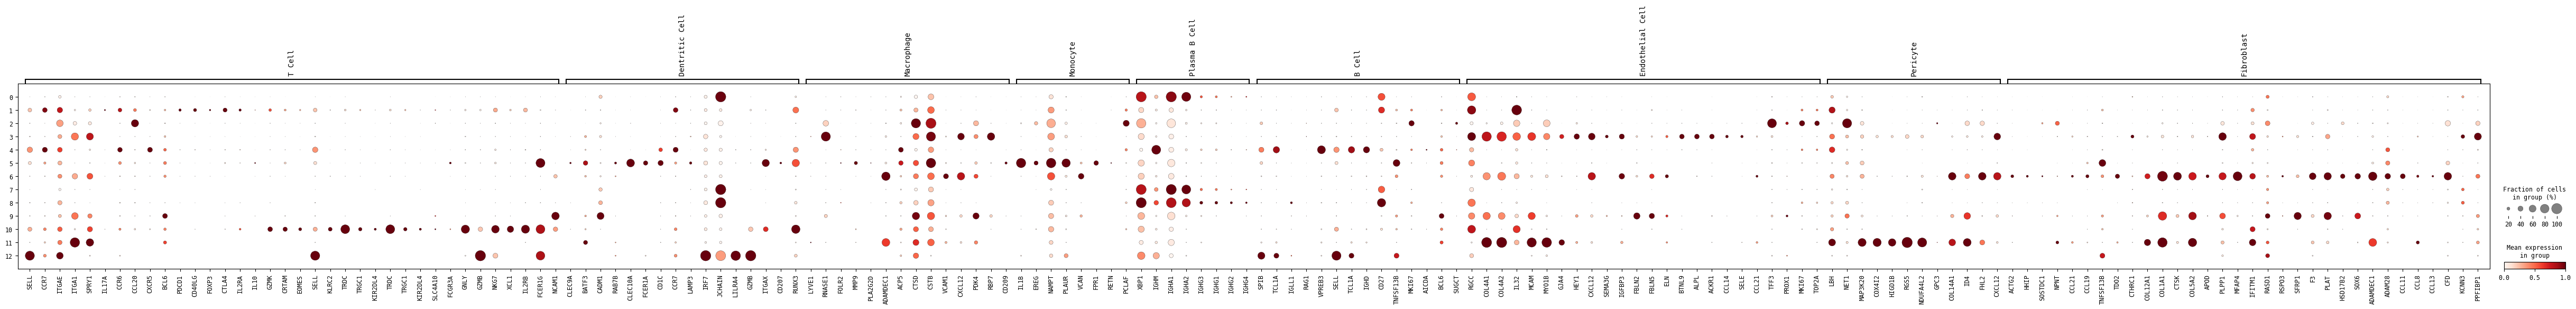

In [9]:
sc.pl.dotplot(
    adata,
    groupby="leiden_res0_6",
    var_names=other_markers,
    standard_scale="var",  # standard scale: normalize each gene to range from 0 to 1
)

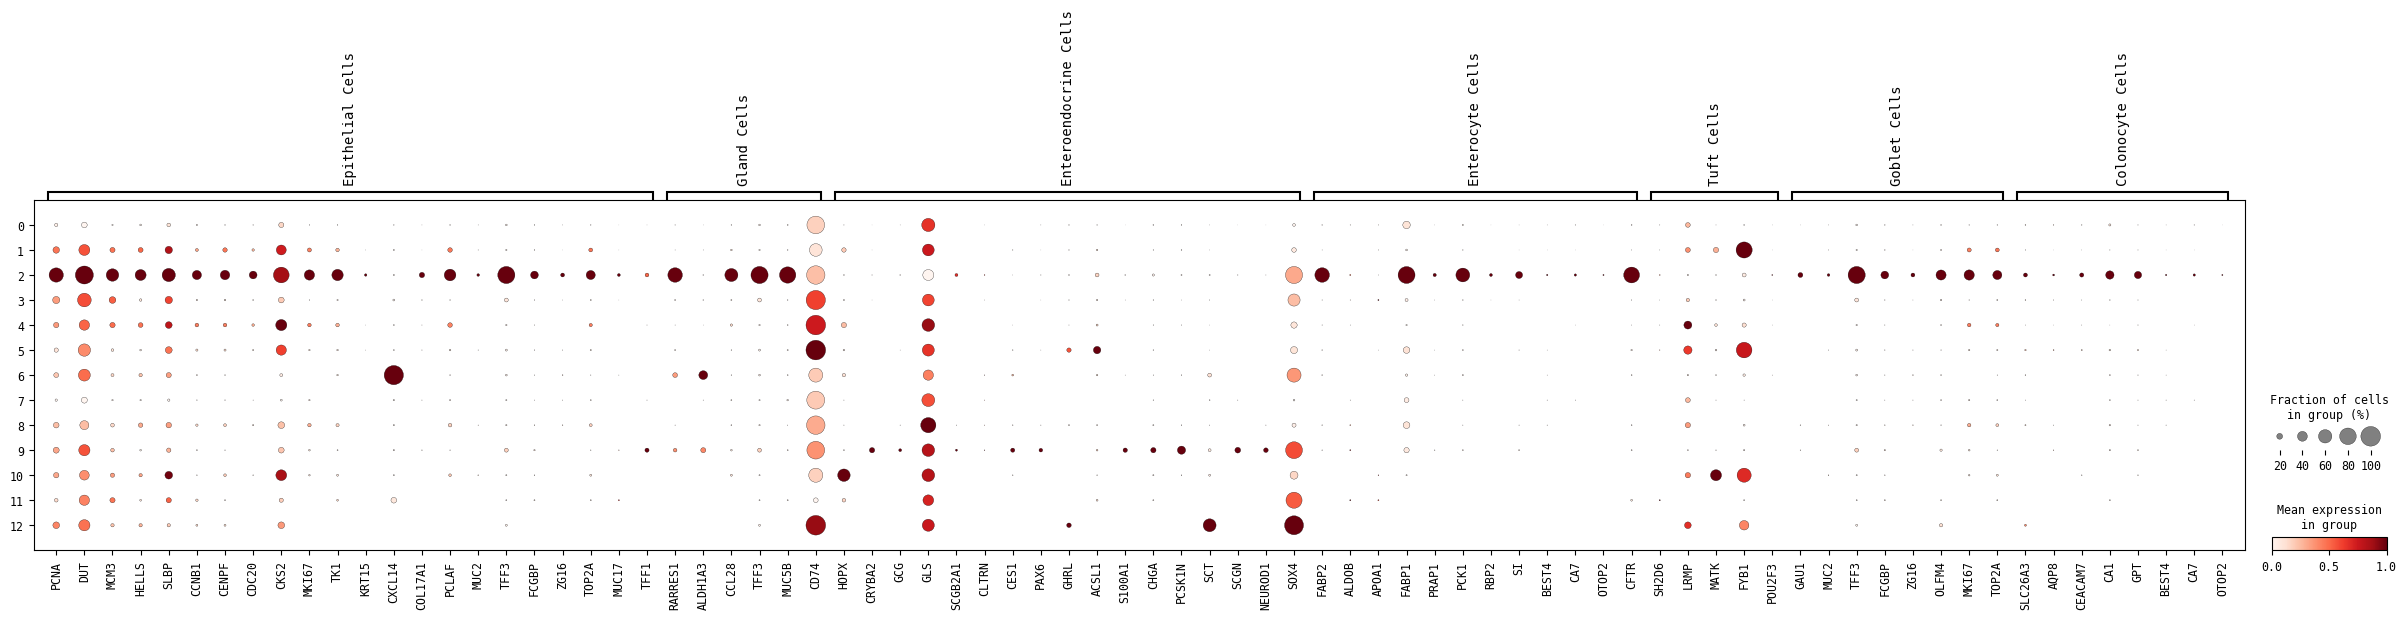

In [10]:
sc.pl.dotplot(
    adata,
    groupby="leiden_res0_6",
    var_names=endo_markers,
    standard_scale="var",  # standard scale: normalize each gene to range from 0 to 1
)

In [11]:
cl_annotation = {
    "0": "Plasma B Cell",
    "1": "Epithelial Cells / Goblet Cells",
    "2": "T Cell / Tuft Cells",
    "3": "Enterocyte Cells", 
    "4": "Endothelial Cell / Macrophage",
    "5": "T Cell", 
    "6": "Monocyte / Dentritic Cell",
    "7": "Pericyte / Fibroblast", 
    "8": "T Cell",
    "9": "Gland Cells",
    "10": "Enterocyte Cells",
    "11": "Plasma B Cell",
    "12": "Enteroendocrine Cells"
}

adata.obs["manual_celltype_annotation"] = adata.obs.leiden_res0_6.map(cl_annotation)

In [12]:
adata_celltypist = adata.copy()  # make a copy of our adata
adata_celltypist.X = adata.layers["raw"]  # set adata.X to raw counts
sc.pp.normalize_per_cell(
    adata_celltypist, counts_per_cell_after=10**4
)  # normalize to 10,000 counts per cell
sc.pp.log1p(adata_celltypist)  # log-transform
# make .X dense instead of sparse, for compatibility with celltypist:
adata_celltypist.X = adata_celltypist.X.toarray()
adata_celltypist

AnnData object with n_obs × n_vars = 5397 × 16719
    obs: 'sampleID', 'barcode', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'outlier', 'mt_outlier', '_scvi_batch', '_scvi_labels', 'leiden_res0_6', 'manual_celltype_annotation', 'n_counts'
    var: 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'neighbors', 'sampleID_colors', 'umap', 'hvg', 'pca', 'leiden', 'leiden_res0_6_colors', 'log1p'
    obsm: 'X_scVI', 'X_umap', 'X_pca'
    varm: 'PCs'
    layers: 'int_norm', 'log_int_norm', 'log_norm', 'norm', 'raw'
    obsp: 'connectivities', 'distances'

In [13]:
models.download_models(
    force_update=True, model=["Cells_Intestinal_Tract.pkl"]
)

model_intestine = models.Model.load(model="Cells_Intestinal_Tract.pkl")

# model_intestine.cell_types

📜 Retrieving model list from server https://celltypist.cog.sanger.ac.uk/models/models.json
📚 Total models in list: 44
📂 Storing models in C:\Users\saman\.celltypist\data\models
💾 Total models to download: 1
💾 Downloading model [1/1]: Cells_Intestinal_Tract.pkl


In [14]:
predictions = celltypist.annotate(
    adata_celltypist, model=model_intestine, majority_voting=True
)

predictions_adata = predictions.to_adata()

🔬 Input data has 5397 cells and 16719 genes
🔗 Matching reference genes in the model


🧬 3101 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
👀 Detected a neighborhood graph in the input object, will run over-clustering on the basis of it
⛓️ Over-clustering input data with resolution set to 10
🗳️ Majority voting the predictions
✅ Majority voting done!


In [15]:
adata.obs["celltypist_cell_label"] = predictions_adata.obs.loc[
    adata.obs.index, "majority_voting"
]
adata.obs["celltypist_conf_score"] = predictions_adata.obs.loc[
    adata.obs.index, "conf_score"
]

celltypist_cell_label_coarse = {
    "T Cell": ["Activated CD4 T", "SELL+ CD4 T", "Tfh", "Treg", "gdT", "CD8 Tmem"], 
    "Dentritic": ["cDC1", "cDC2", "Lymphoid DC", "pDC"], 
    "B Cell": ["Cycling B cell", "GC B cell", "Memory B", "STAT1+ Naive B", "Naive B"], 
    "Stromal": ['Stromal 1 (CCL11+)', 'Stromal 2 (NYP+)', 'Stromal 2 (NPY+)'], 
    "Enteroendocrine": ['Mature arterial EC', 'Mature venous EC', 'EC cells (TAC1+)', ''],
    "Epithelial": ['BEST4+ epithelial', 'Microfold cell', 'arterial capillary', "TA"], 
    "Plasma": ['IgA plasma cell', 'IgG plasma cell'], 
    "Goblet": ['BEST2+ Goblet cell'], 
    
}

adata.obs['celltypist_cell_label_coarse'] = adata.obs['celltypist_cell_label']

for coarse, fine in celltypist_cell_label_coarse.items():
    adata.obs['celltypist_cell_label_coarse'] = np.where([adata.obs['celltypist_cell_label'].isin(fine)], coarse, adata.obs['celltypist_cell_label_coarse'])[0]

adata.obs.head()

,sampleID,barcode,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_20_genes,total_counts_mt,log1p_total_counts_mt,pct_counts_mt,...,pct_counts_hb,outlier,mt_outlier,_scvi_batch,_scvi_labels,leiden_res0_6,manual_celltype_annotation,celltypist_cell_label,celltypist_conf_score,celltypist_cell_label_coarse
CID005217-1-AACAGGGGTGAATGAT,CID005217-1,AACAGGGGTGAATGAT,1800,7.496097,4670.0,8.449128,25.074946,422.0,6.047372,9.036403,...,0.021413,False,False,0,0,6,Monocyte / Dentritic Cell,mLTo,0.996879,mLTo
CID005217-1-AACCAACGTCATCGCG,CID005217-1,AACCAACGTCATCGCG,2651,7.883069,7685.0,8.947156,17.748861,578.0,6.361302,7.521145,...,0.000000,False,False,0,0,5,T Cell,Monocytes,0.999052,Monocytes
CID005217-1-AACCACAAGAGGCCAT,CID005217-1,AACCACAAGAGGCCAT,1781,7.485492,4730.0,8.461892,21.057082,419.0,6.040255,8.858351,...,0.000000,False,False,0,0,4,Endothelial Cell / Macrophage,STAT1+ Naive B,0.902197,B Cell
CID005217-1-AACCTTTAGCTCGGCT,CID005217-1,AACCTTTAGCTCGGCT,1869,7.533694,4648.0,8.444407,24.462134,616.0,6.424869,13.253013,...,0.000000,False,False,0,0,3,Enterocyte Cells,arterial capillary,0.999861,Epithelial
CID005217-1-AACGAAATCCAAAGGG,CID005217-1,AACGAAATCCAAAGGG,1965,7.583756,4482.0,8.408048,14.770192,267.0,5.590987,5.957162,...,0.000000,False,False,0,0,4,Endothelial Cell / Macrophage,Cycling B cell,0.996552,B Cell


... storing 'manual_celltype_annotation' as categorical
... storing 'celltypist_cell_label_coarse' as categorical


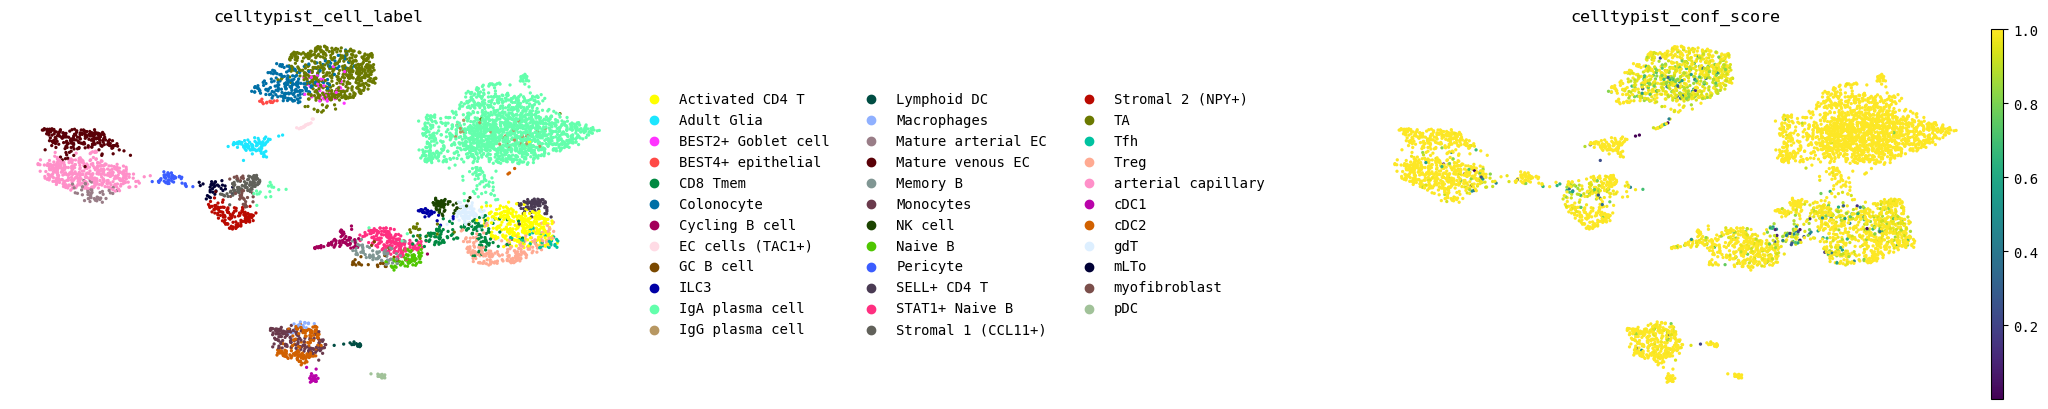

In [16]:
sc.pl.umap(
    adata,
    color=["celltypist_cell_label", "celltypist_conf_score"],
    frameon=False,
    sort_order=False,
    wspace=1,
    #legend_loc="on_data",
)

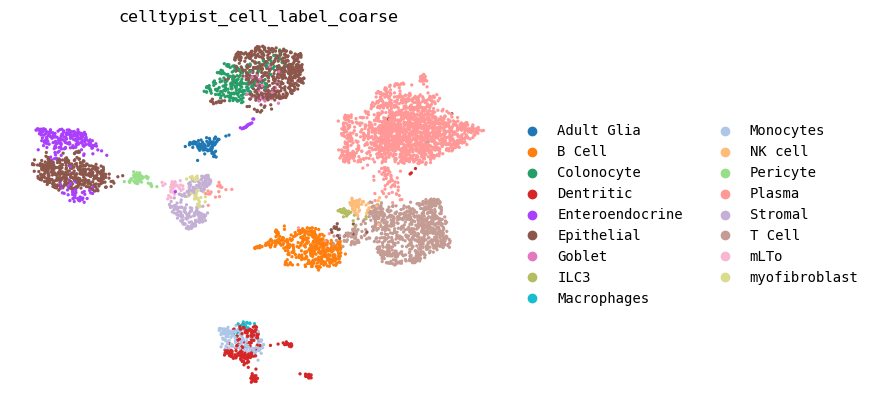

In [17]:
sc.pl.umap(
    adata,
    color=["celltypist_cell_label_coarse"],
    frameon=False,
    #legend_loc = "on data",
)

In [18]:
adata.write_h5ad("C:/Users/saman/00_Bachelorarbeit/Bachelor/data/output/adata.h5ad")

## Gene Expression Viz

In [25]:
adata = anndata.read_h5ad("C:/Users/saman/00_Bachelorarbeit/Bachelor/data/output/adata.h5ad")
adata

AnnData object with n_obs × n_vars = 5397 × 16719
    obs: 'sampleID', 'barcode', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'outlier', 'mt_outlier', '_scvi_batch', '_scvi_labels', 'leiden_res0_6', 'manual_celltype_annotation', 'celltypist_cell_label', 'celltypist_conf_score', 'celltypist_cell_label_coarse'
    var: 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'celltypist_cell_label_coarse_colors', 'celltypist_cell_label_colors', 'hvg', 'leiden', 'leiden_res0_6_colors', 'neighbors', 'pca', 'sampleID_colors', 'umap'
    obsm: 'X_pca', 'X_scVI', 'X_umap'
    varm: 'PCs'
    layers: 'int_norm', 'log_int_norm', 'log_norm', 'norm', 'raw'
    obsp: 'connectivitie

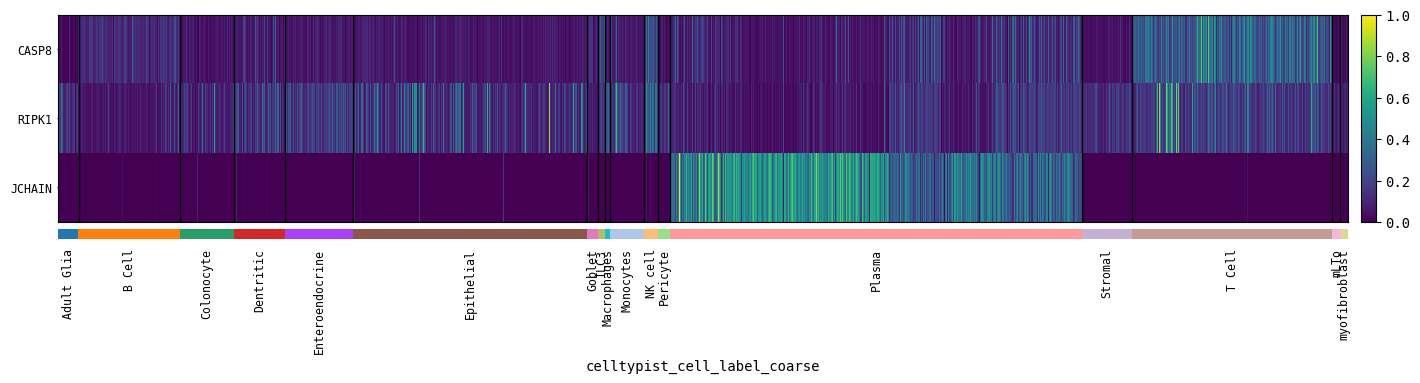

In [126]:
markers = ['CASP8', 'RIPK1', 'JCHAIN']
sc.pl.heatmap(adata, markers, groupby='celltypist_cell_label_coarse', swap_axes=True, figsize=(17,3), layer='log_int_norm', standard_scale='var')
# standard_scale: for each variable (gene), subtract the minimum and divide each by its maximum

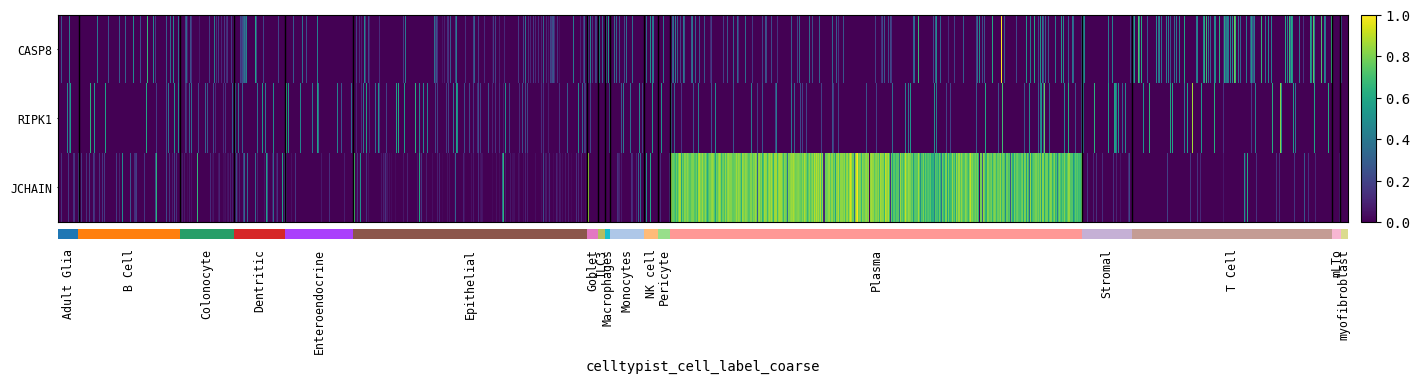

In [124]:
sc.pl.heatmap(adata, markers, groupby='celltypist_cell_label_coarse', swap_axes=True, figsize=(17,3), layer='log_norm', standard_scale='var')

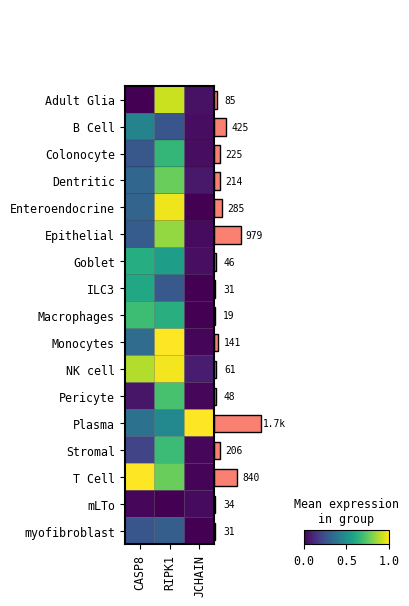

In [19]:
ax1 = sc.pl.matrixplot(adata, markers, groupby='celltypist_cell_label_coarse', return_fig=True, layer='log_norm', standard_scale='var')
ax1.add_totals().style(edge_color='black').show()

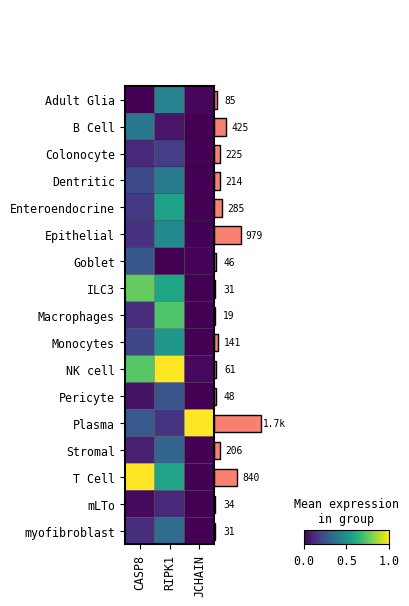

In [21]:
ax2 = sc.pl.matrixplot(adata, markers, groupby='celltypist_cell_label_coarse', return_fig=True, layer='log_int_norm', standard_scale='var')
ax2.add_totals().style(edge_color='black').show()

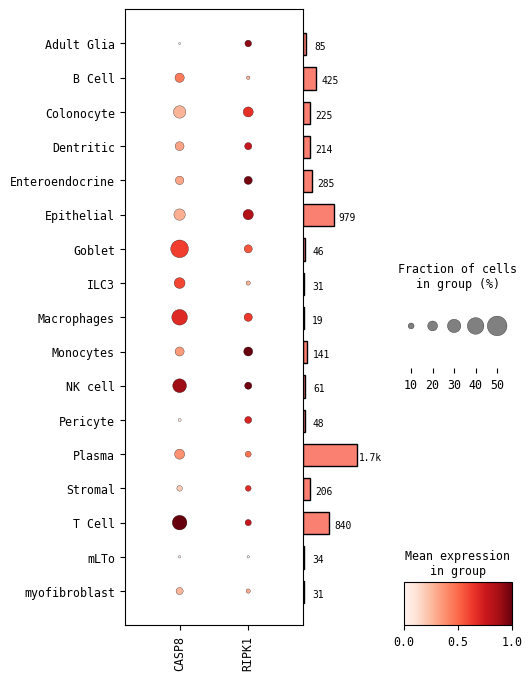

In [147]:
markers=['CASP8', 'RIPK1']
ax1 = sc.pl.dotplot(adata, var_names=markers, groupby='celltypist_cell_label_coarse', return_fig=True, figsize=(5,8), standard_scale='var')
ax1.add_totals().show()
# combo of fraction of cells in group and total count bars shows an idea of lowly, medium, highly expressed genes
# TODO: method to automatically classify gene into three categories? ranking? 

## Overall expression level of specific gene

In [98]:
# TODO
# is overall classification different in any single cell type? 
# make text statement about gene of interest
goi = "CASP8"

In [119]:
adata

AnnData object with n_obs × n_vars = 5397 × 16719
    obs: 'sampleID', 'barcode', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'outlier', 'mt_outlier', '_scvi_batch', '_scvi_labels', 'leiden_res0_6', 'manual_celltype_annotation', 'celltypist_cell_label', 'celltypist_conf_score', 'celltypist_cell_label_coarse'
    var: 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'celltypist_cell_label_coarse_colors', 'celltypist_cell_label_colors', 'hvg', 'leiden', 'leiden_res0_6_colors', 'neighbors', 'pca', 'sampleID_colors', 'umap'
    obsm: 'X_pca', 'X_scVI', 'X_umap'
    varm: 'PCs'
    layers: 'int_norm', 'log_int_norm', 'log_norm', 'norm', 'raw'
    obsp: 'connectivitie

In [177]:
# filter out high count outliers here
def clean_data(df, col, threshold = 99.75):
    data = df[col].to_numpy().flatten()
    data = data[data <= np.percentile(data, threshold)]
    return data

def find_thresholds(filtered):
    range = (abs(max(filtered)) + abs(min(filtered)))
    step = range / float(4)
    very_low = min(filtered) + step
    low = min(filtered) + step*2
    middle = min(filtered) + step*3
    print(round(very_low, 2), round(low, 2), round(middle, 2), round(max(filtered), 2))
    return very_low, low, middle, max(filtered)

def classify_exp_level(df, filtered, col):
    very_low, low, middle, high = find_thresholds(filtered)
    def func(x):
        if x <= very_low:
            return "very_low"
        elif very_low < x <= low:
            return "low"
        elif low < x <= middle:
            return "middle"
        elif middle < x <= high:
            return "high"
        else:
            return "very_high"
    df['expr_class'] = df[col].apply(func)
    return df

In [189]:
df = adata.var.sort_values(['means'])
df['gene_num'] = range(len(df))
df['log(means)'] = np.log(df['means'])
df['log1p(means)'] = np.log1p(df['means'])
df

,n_cells,highly_variable,means,dispersions,dispersions_norm,gene_num,log(means),log1p(means)
index,,,,,,,,
AC015813.2,20,False,0.001254,-0.846862,-2.593408,0,-6.681346,0.001253
AC023302.1,20,False,0.001290,-0.730088,-2.341766,1,-6.653130,0.001289
AL137785.1,20,False,0.001313,-0.871707,-2.646946,2,-6.635540,0.001312
SH3GL2,22,False,0.001373,-0.866493,-2.635710,3,-6.590851,0.001372
LINC02012,22,False,0.001432,-0.780388,-2.450160,4,-6.548957,0.001431
...,...,...,...,...,...,...,...,...
IGLC3,1962,False,4.974173,8.053759,1.000000,16714,1.604259,1.787446
IGLC2,2535,False,5.298882,8.070549,0.950056,16715,1.667496,1.840372
MALAT1,5385,False,5.416716,4.798492,-1.043399,16716,1.689490,1.858906


0.36 0.71 1.07 1.43


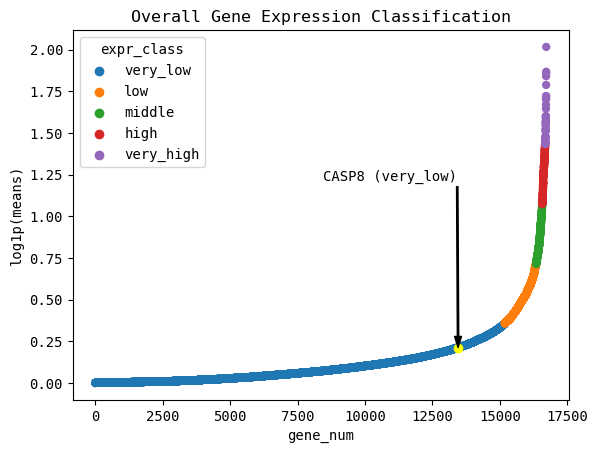

In [190]:
col = 'log1p(means)'
filtered = clean_data(df, col=col, threshold=99.75)
df_new = classify_exp_level(df =df, filtered=filtered, col=col)


g = sns.scatterplot(data=df_new, x='gene_num',  y=col, hue='expr_class', linewidth=0)
annotation = str(goi + " (" + df_new.loc[df_new.index == goi]['expr_class'].values[0] + ")")
highlight_y = df_new.loc[df_new.index == goi][col]
highlight_x = df_new.loc[df_new.index == goi]['gene_num']
g.scatter(highlight_x, highlight_y, color = 'yellow', linewidth=1)
props = dict(facecolor='black', width=1, headwidth=5, headlength=8)
g.annotate(annotation, (highlight_x, highlight_y), (highlight_x-5000, highlight_y+1), arrowprops=props)
g.set_title(str("Overall Gene Expression Classification"))
plt.show()

In [195]:
# overall expression for one cell type

cell_type = 'T Cell'
adata_sub = adata[adata.obs['celltypist_cell_label_coarse'] == cell_type]
adata_sub

,sampleID,barcode,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_20_genes,total_counts_mt,log1p_total_counts_mt,pct_counts_mt,...,pct_counts_hb,outlier,mt_outlier,_scvi_batch,_scvi_labels,leiden_res0_6,manual_celltype_annotation,celltypist_cell_label,celltypist_conf_score,celltypist_cell_label_coarse
CID005217-1-AAGCATCCACAGCATT,CID005217-1,AAGCATCCACAGCATT,1746,7.465655,4512.0,8.414718,22.030142,402.0,5.998937,8.909575,...,0.000000,False,False,0,0,4,Endothelial Cell / Macrophage,CD8 Tmem,0.990920,T Cell
CID005217-1-AAGTTCGGTCACCGAC,CID005217-1,AAGTTCGGTCACCGAC,1594,7.374629,4671.0,8.449343,23.720831,388.0,5.963579,8.306573,...,0.000000,False,False,0,0,1,Epithelial Cells / Goblet Cells,Activated CD4 T,0.970735,T Cell
CID005217-1-AATAGAGTCACCTCAC,CID005217-1,AATAGAGTCACCTCAC,3319,8.107720,10781.0,9.285633,17.159818,750.0,6.621406,6.956683,...,0.000000,False,False,0,0,1,Epithelial Cells / Goblet Cells,Treg,0.988546,T Cell
CID005217-1-AGCCAATTCCACCTCA,CID005217-1,AGCCAATTCCACCTCA,2031,7.616776,4552.0,8.423542,14.389279,222.0,5.407172,4.876977,...,0.000000,False,False,0,0,1,Epithelial Cells / Goblet Cells,CD8 Tmem,0.996549,T Cell
CID005217-1-AGCGCTGGTGAGACCA,CID005217-1,AGCGCTGGTGAGACCA,3499,8.160518,12944.0,9.468465,19.406675,1291.0,7.163947,9.973733,...,0.007726,False,False,0,0,1,Epithelial Cells / Goblet Cells,Treg,0.995140,T Cell
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CID008474-1-GGCACGTCATTACGGT,CID008474-1,GGCACGTCATTACGGT,2430,7.796058,7012.0,8.855521,20.864233,414.0,6.028278,5.904164,...,0.000000,False,False,5,0,1,Epithelial Cells / Goblet Cells,Treg,0.971432,T Cell
CID008474-1-TAGTGCAAGTCGCGAA,CID008474-1,TAGTGCAAGTCGCGAA,2424,7.793587,7117.0,8.870382,16.917240,359.0,5.886104,5.044260,...,0.014051,False,False,5,0,1,Epithelial Cells / Goblet Cells,CD8 Tmem,0.999985,T Cell
CID008474-1-TCACATTAGTAAACAC,CID008474-1,TCACATTAGTAAACAC,2296,7.739359,6411.0,8.765926,20.995165,323.0,5.780744,5.038216,...,0.031196,False,False,5,0,1,Epithelial Cells / Goblet Cells,Activated CD4 T,0.999975,T Cell
CID008474-1-TCAGTCCCAACATACC,CID008474-1,TCAGTCCCAACATACC,2379,7.774856,6842.0,8.830981,24.261912,835.0,6.728629,12.204034,...,0.000000,False,False,5,0,1,Epithelial Cells / Goblet Cells,Activated CD4 T,0.999494,T Cell


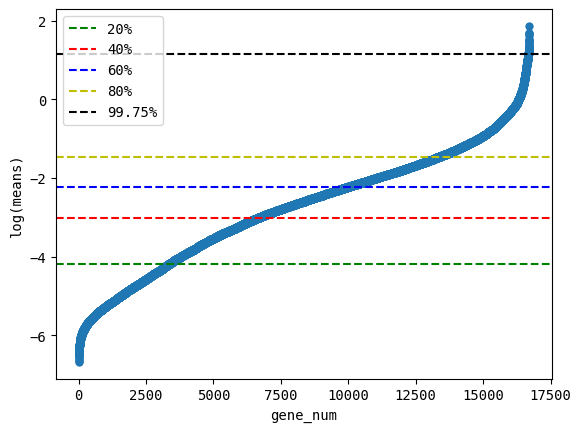

In [162]:
ax = sns.scatterplot(data=df, x='gene_num', y='log(means)', linewidth=0)
ax.axhline(np.percentile(df['log(means)'], 20), linestyle="--", color="g", label='20%')
ax.axhline(np.percentile(df['log(means)'], 40), linestyle="--", color="r", label='40%')
ax.axhline(np.percentile(df['log(means)'], 60), linestyle="--", color="b", label='60%')
ax.axhline(np.percentile(df['log(means)'], 80), linestyle="--", color="y", label='80%')
ax.axhline(np.percentile(df['log(means)'], 99.75), linestyle="--", color="black", label='99.75%')
ax.legend()
plt.show()

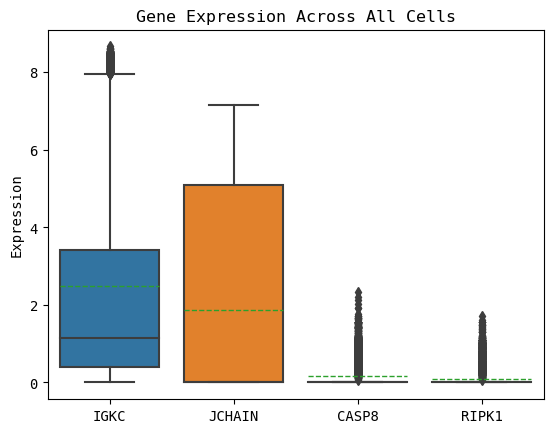

In [110]:
# viz for overall expression of gene 

genes = ['IGKC', 'JCHAIN', 'CASP8', 'RIPK1']
data = adata[:, genes]
df = data.to_df()
df['cell_type'] = data.obs['celltypist_cell_label_coarse']
df['sample'] = data.obs['sampleID']
#data = data[data != 0]

plot = sns.boxplot(data=df, showmeans=True, meanline=True)
plot.set_ylabel("Expression")
plot.set_xlabel("")
plot.set_title("Gene Expression Across All Cells")
plt.show()

In [141]:
df_1 = df[['CASP8', 'cell_type', 'sample']]
df_1['gene'] = 'CASP8'
df_1 = df_1.rename({'CASP8': 'exp'}, axis=1)
df_2 = df[['RIPK1', 'cell_type', 'sample']]
df_2['gene'] = 'RIPK1'
df_2 = df_2.rename({'RIPK1': 'exp'}, axis=1)
df_3 = df[['JCHAIN', 'cell_type', 'sample']]
df_3['gene'] = 'JCHAIN'
df_3 = df_3.rename({'JCHAIN': 'exp'}, axis=1)

df_long = df_1.append([df_2, df_3], ignore_index=True)
df_long

C:\Users\saman\AppData\Local\Temp\ipykernel_25236\2416375087.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['gene'] = 'CASP8'
C:\Users\saman\AppData\Local\Temp\ipykernel_25236\2416375087.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['gene'] = 'RIPK1'
C:\Users\saman\AppData\Local\Temp\ipykernel_25236\2416375087.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

index,exp,cell_type,sample,gene
0,0.000000,mLTo,CID005217-1,CASP8
1,0.000000,Monocytes,CID005217-1,CASP8
2,0.000000,B Cell,CID005217-1,CASP8
3,0.000000,Epithelial,CID005217-1,CASP8
4,0.000000,B Cell,CID005217-1,CASP8
...,...,...,...,...
16186,6.062057,Plasma,CID008474-1,JCHAIN
16187,0.000000,Epithelial,CID008474-1,JCHAIN
16188,0.000000,Epithelial,CID008474-1,JCHAIN
16189,0.157670,Epithelial,CID008474-1,JCHAIN


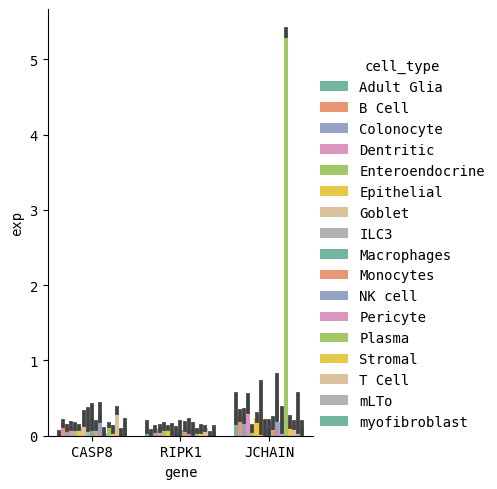

In [144]:
# per cell type? 

sns.catplot(data=df_long, x='gene', y='exp', hue='cell_type', kind='bar', height=5, aspect=0.7, palette="Set2")

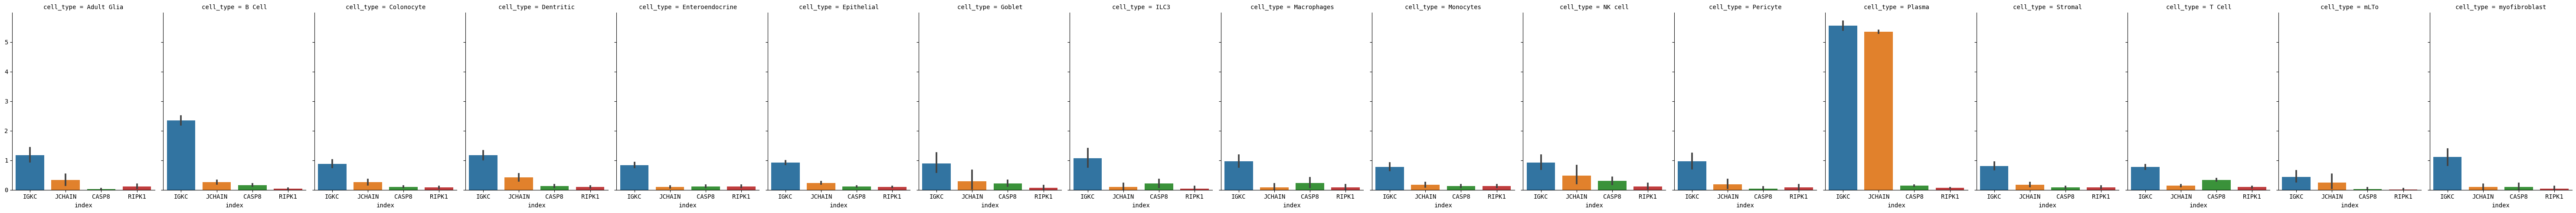

In [146]:
sns.catplot(data=df, col='cell_type', kind='bar', height=6, aspect=0.7)

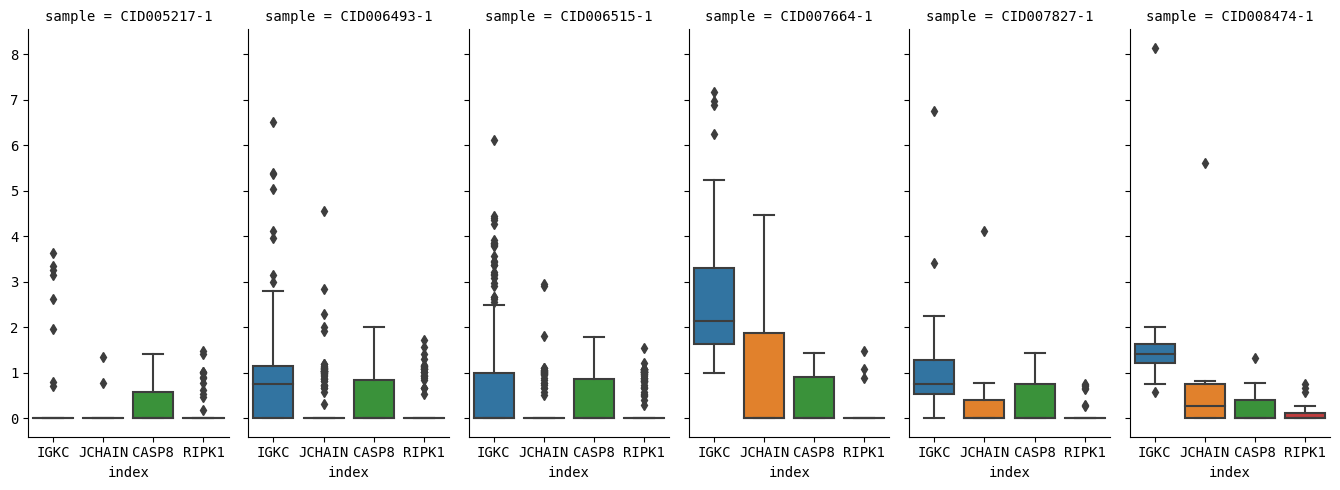

In [149]:
# per patient (sample)
df_cell = df[df['cell_type'] == 'T Cell']
sns.catplot(data=df_cell, col='sample', kind='box', height=5, aspect=0.45)
# shows cell type composition 
# do this for one specific cell type 

In [196]:
df

,n_cells,highly_variable,means,dispersions,dispersions_norm,gene_num,log(means),log1p(means),expr_class
index,,,,,,,,,
AC015813.2,20,False,0.001254,-0.846862,-2.593408,0,-6.681346,0.001253,very_low
AC023302.1,20,False,0.001290,-0.730088,-2.341766,1,-6.653130,0.001289,very_low
AL137785.1,20,False,0.001313,-0.871707,-2.646946,2,-6.635540,0.001312,very_low
SH3GL2,22,False,0.001373,-0.866493,-2.635710,3,-6.590851,0.001372,very_low
LINC02012,22,False,0.001432,-0.780388,-2.450160,4,-6.548957,0.001431,very_low
...,...,...,...,...,...,...,...,...,...
IGLC3,1962,False,4.974173,8.053759,1.000000,16714,1.604259,1.787446,very_high
IGLC2,2535,False,5.298882,8.070549,0.950056,16715,1.667496,1.840372,very_high
MALAT1,5385,False,5.416716,4.798492,-1.043399,16716,1.689490,1.858906,very_high
